In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


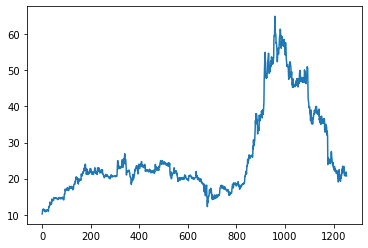

In [2]:
dataset = pd.read_csv('PBL.TO.csv',
usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:

dataset = dataset.values
dataset = dataset.astype('float32')

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

import pandas as pd
df = pd.read_csv('PBL.TO.csv')
df.head(10)

df.isna().sum()

df.isna().sum()/len(df)*100

df.dropna(axis=1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/4/2017,10.210000,10.700000,10.210000,10.700000,10.362569,18400
1,7/5/2017,10.750000,11.310000,10.750000,11.310000,10.953333,16700
2,7/6/2017,11.250000,11.500000,11.250000,11.350000,10.992070,13000
3,7/7/2017,11.490000,11.490000,11.310000,11.490000,11.127651,9900
4,7/10/2017,11.500000,11.500000,11.390000,11.400000,11.040494,3300
...,...,...,...,...,...,...,...
1249,6/24/2022,21.379999,22.500000,21.330000,22.150000,22.109283,20200
1250,6/27/2022,21.730000,22.120001,21.340000,21.840000,21.799854,33600
1251,6/28/2022,21.850000,22.059999,21.309999,21.760000,21.720001,15600
1252,6/29/2022,20.889999,21.059999,20.799999,20.940001,20.940001,5200


In [5]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
# load the dataset
dataframe = pd.read_csv('PBL.TO.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

840 414


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
838/838 - 2s - loss: 0.0038 - 2s/epoch - 3ms/step
Epoch 2/100
838/838 - 1s - loss: 9.1945e-04 - 1s/epoch - 1ms/step
Epoch 3/100
838/838 - 1s - loss: 1.2088e-04 - 1s/epoch - 1ms/step
Epoch 4/100
838/838 - 1s - loss: 1.0519e-04 - 996ms/epoch - 1ms/step
Epoch 5/100
838/838 - 1s - loss: 1.0525e-04 - 784ms/epoch - 935us/step
Epoch 6/100
838/838 - 1s - loss: 1.0918e-04 - 880ms/epoch - 1ms/step
Epoch 7/100
838/838 - 1s - loss: 1.0585e-04 - 778ms/epoch - 929us/step
Epoch 8/100
838/838 - 1s - loss: 1.0752e-04 - 891ms/epoch - 1ms/step
Epoch 9/100
838/838 - 1s - loss: 1.0943e-04 - 1s/epoch - 1ms/step
Epoch 10/100
838/838 - 1s - loss: 1.0805e-04 - 785ms/epoch - 936us/step
Epoch 11/100
838/838 - 1s - loss: 1.1166e-04 - 827ms/epoch - 987us/step
Epoch 12/100
838/838 - 1s - loss: 1.0247e-04 - 853ms/epoch - 1ms/step
Epoch 13/100
838/838 - 1s - loss: 1.0341e-04 - 1s/epoch - 1ms/step
Epoch 14/100
838/838 - 1s - loss: 1.0606e-04 - 968ms/epoch - 1ms/step
Epoch 15/100
838/838 - 1s - loss: 1.0514

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict




In [14]:

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict




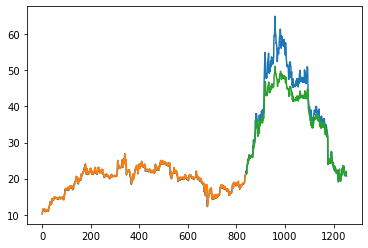

In [15]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.54 RMSE
Test Score: 4.81 RMSE


In [17]:
RMSE = 0.52
accuracy = 100 - np.mean(RMSE)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.48 %.


In [18]:
RMSE = 4.64
accuracy = 100 - np.mean(RMSE)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.36 %.
